<h1 style="text-align: center; color: #0066CC;">About dataset</h1>

This dataset provides key resources:
- **beer_reviews.csv**: Contains the training data with property features
[Dataset link](https://data.world/socialmediadata/beeradvocate)

This dataset consists of beer reviews from Beeradvocate. The data span a period of more than 10 years, including all ~1.5 million reviews up to November 2011. Each review includes ratings in terms of five "aspects": appearance, aroma, palate, taste, and overall impression. Reviews include product and user information, followed by each of these five ratings, and a plaintext review. We also have reviews from ratebeer.

The columns in this dataset are:
* brewery_id
* brewery_name
* review_time
* review_overall
* review_aroma
* review_appearance
* review_profilename
* beer_style
* review_palate
* review_taste
* beer_name
* beer_abv
* beer_beerid


<h2 style="text-align: center; color: #0066CC;">Aims and objective of project</h2>

Aim of the project is to anwser a 4 question: 
* Which brewery produces the strongest beers by abv ?

* If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

* What are the factors that impacts the quality of beer the most ?

* I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

# Import libraries and Initial Data Exploration

## Import libraries

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploring dataset

In [103]:
# Load the dataset
df = pd.read_csv('beer_reviews.csv')

In [104]:
# Head of the dataset
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [105]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [106]:
# Shape of the dataset
print(f"Beer review data: \nThere is {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

Beer review data: 
There is 1586614 rows and 13 columns in the dataset.


In [107]:
# Empty fields
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [108]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

beer_abv              0.042723
review_profilename    0.000219
brewery_name          0.000009
dtype: float64

# 1. Which brewery produces the strongest beers by ABV?

In [109]:
df.groupby('brewery_name')['beer_abv'].describe().sort_values('mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
brewery_name,,,,,,,,
Schorschbräu,34.0,19.228824,12.327304,4.9,13.0,13.0,16.0,57.7
Shoes Brewery,2.0,15.200000,0.000000,15.2,15.2,15.2,15.2,15.2
Rome Brewing Company,5.0,13.840000,1.971801,12.4,12.4,12.4,16.0,16.0
Hurlimann Brewery,18.0,13.750000,0.575224,12.5,14.0,14.0,14.0,14.0
Alt-Oberurseler Brauhaus,1.0,13.200000,NaN,13.2,13.2,13.2,13.2,13.2


In [110]:
df.groupby('brewery_name')['beer_abv'].max().sort_values(ascending=False).head(1)

brewery_name
Schorschbräu    57.7
Name: beer_abv, dtype: float64

In [111]:
df.groupby('brewery_name')['beer_abv'].mean().sort_values(ascending=False).head(1)

brewery_name
Schorschbräu    19.228824
Name: beer_abv, dtype: float64

In [112]:
df.groupby('brewery_name')['beer_abv'].median().sort_values(ascending=False).head(1)

brewery_name
Shoes Brewery    15.2
Name: beer_abv, dtype: float64

## Anwser

The brewery that produces the strongest beers, based on the highest mean ABV, is **Schorschbräu** with a mean ABV of 19.23% and a maximum ABV of 57.7%.

# 2. If you had to pick 3 beers to recommend to someone, how would you approach the problem?

In [113]:
df['review_overall'].value_counts()

review_overall
4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
Name: count, dtype: int64

In [114]:
review_counts = df.groupby('beer_name').size().sort_values(ascending=False).reset_index(name='review_count')
review_means = df.groupby('beer_name')['review_overall'].mean().reset_index(name='avg_review_overall')

review_counts = pd.merge(review_counts, review_means, on='beer_name', how='left')
review_counts = review_counts.sort_values(by='review_count', ascending=False)

review_counts

,beer_name,review_count,avg_review_overall
0,90 Minute IPA,3290,4.145745
1,India Pale Ale,3130,3.842812
2,Old Rasputin Russian Imperial Stout,3111,4.174221
3,Sierra Nevada Celebration Ale,3000,4.168667
4,Two Hearted Ale,2728,4.329729
...,...,...,...
44250,Churchyard Strong Ale,1,4.000000
44249,Chyerniy Ale,1,2.000000
44248,Chyernogolovskoye Ekstra,1,3.000000
44247,Châtaigne,1,3.500000


In [115]:
def analyze_review_counts(df):
    # Calculate the distribution of ratings
    review_distribution = df['review_overall'].value_counts().sort_index()
    ratings = review_distribution.index.to_numpy()
    counts = review_distribution.to_numpy()

    # Calculate the mean rating and standard deviation based on the actual distribution of ratings
    mean_rating = np.average(ratings, weights=counts)
    variance = np.average((ratings - mean_rating) ** 2, weights=counts)
    std_dev = np.sqrt(variance)

    # Group by beer name and count the number of reviews
    review_counts = df.groupby('beer_name')['review_overall'].count().reset_index(name='review_count')

    # Calculate percentiles of review counts per beer
    percentiles = review_counts['review_count'].describe(percentiles=[.25, .5, .75, .9, .95, .99])

    print("Review Count Statistics per Beer:")
    print(percentiles)

    # Plot histogram of review counts
    plt.figure(figsize=(10, 6))
    plt.hist(review_counts['review_count'], bins=50, edgecolor='black')
    plt.title('Distribution of Review Counts')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Frequency')
    plt.yscale('log')  # Logarithmic scale for the y-axis
    plt.show()

    # Calculate margin of error for different review counts
    review_counts_list = [5, 10, 20, 30, 50, 100, 200, 500, 1000, 1500, 2000, 3000]
    z_score = 1.96  # Z-score for 95% confidence level
    margins_of_error = [
        z_score * (std_dev / np.sqrt(count)) for count in review_counts_list
    ]

    # Plot margin of error versus number of reviews
    plt.figure(figsize=(10, 6))
    plt.plot(review_counts_list, margins_of_error, marker='o')
    target_moe = 0.05
    plt.axhline(y=target_moe, color='red', linestyle='--', label=f'Margin of Error = {target_moe}')
    plt.title('Margin of Error vs. Number of Reviews')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Margin of Error (95% Confidence)')
    plt.legend()
    plt.show()

    # Calculate the number of reviews needed to achieve specific margins of error
    target_margins_of_error = [0.05, 0.1]
    reviews_needed = [
        (z_score * std_dev / moe) ** 2 for moe in target_margins_of_error
    ]

    print("\nNumber of Reviews Needed to Achieve Specific Margin of Error:")
    for moe, reviews in zip(target_margins_of_error, reviews_needed):
        print(f"Margin of Error: {moe} -> Required Number of Reviews: {int(np.ceil(reviews))}")

    return percentiles, review_counts_list, margins_of_error

Review Count Statistics per Beer:
count    56857.000000
mean        27.905341
std        122.198636
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
90%         43.000000
95%        113.000000
99%        532.000000
max       3290.000000
Name: review_count, dtype: float64


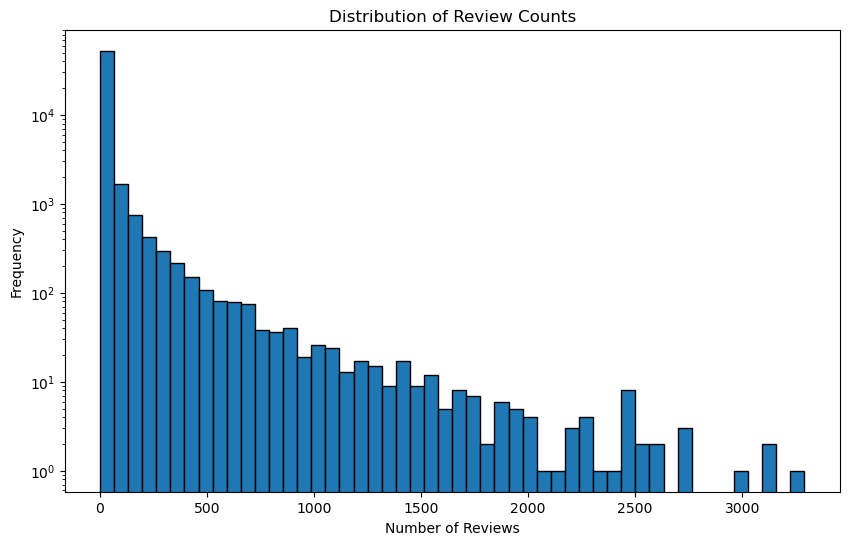

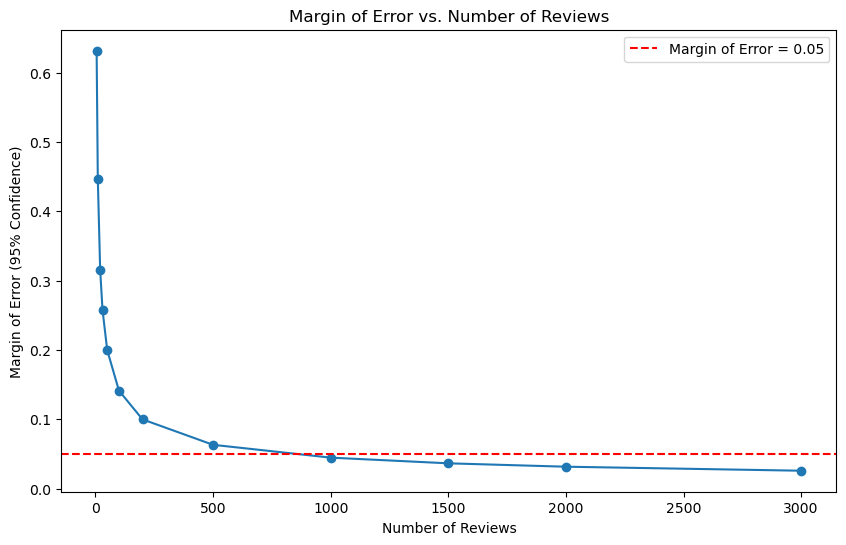


Number of Reviews Needed to Achieve Specific Margin of Error:
Margin of Error: 0.05 -> Required Number of Reviews: 798
Margin of Error: 0.1 -> Required Number of Reviews: 200


In [116]:
percentiles, review_counts_list, margins_of_error = analyze_review_counts(df)

In [117]:
top_3 = review_counts[review_counts['review_count']>=798]
top_3.sort_values('avg_review_overall', ascending = False).head(3)

,beer_name,review_count,avg_review_overall
122,Trappist Westvleteren 12,1272,4.617925
9,Pliny The Elder,2527,4.590028
33,Weihenstephaner Hefeweissbier,1981,4.515901


## Anwser

Analyzing the data on beer reviews revealed significant variability in the number of reviews for each beer, which greatly impacts the reliability of the results. Some beers have over 3,000 reviews, while others have only one. This wide range makes it challenging to accurately assess a beer with just a single review.

The average number of reviews is 27, but the high standard deviation (122) indicates that the data is highly dispersed. Additionally, 75% of beers have 9 or fewer reviews, suggesting that only a small portion of beers are widely reviewed.

To obtain reliable results, it was necessary to apply the margin of error measure. It was found that achieving a margin of error of 0.05 requires at least 798 reviews. Therefore, the focus was placed on beers that meet this criterion, which allowed for more precise and representative results for the best beers.

This analysis shows that to ensure the reliability of beer ratings, it is essential to consider the number of reviews and the margin of error. This approach helps identify the truly best beers, such as:

* Trappist Westvleteren
* Pliny The Elder
* Weihenstephaner Hefeweissbier

# 3. What are the factors that impacts the quality of beer the most ?

## Correlation of features

In [118]:
numerical_vars = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']

# Compute correlation matrix
correlation_matrix = df[['review_overall'] + numerical_vars].corr()

# Extract correlations with 'review_overall'
correlations_with_overall = correlation_matrix['review_overall'].drop('review_overall').sort_values(ascending=False)

print("Correlation of 'review_overall' with other numerical variables:")
print(correlations_with_overall)

Correlation of 'review_overall' with other numerical variables:
review_taste         0.789816
review_palate        0.701914
review_aroma         0.616013
review_appearance    0.501732
beer_abv             0.138512
Name: review_overall, dtype: float64


## ML Models

### Feature engineering

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['beer_style_encoded'] = le.fit_transform(df['beer_style'])
# Encode the 'beer_style' column and add the encoded values as a new column 'beer_style_encoded' in the DataFrame
# The 'beer_style' column, which contains categorical data (e.g., beer types), is transformed into numeric labels

df_to_ml = df.drop(['review_profilename', 'beer_style', 'beer_name', 'brewery_name'], axis=1)  # Drop the specified columns from the DataFrame, retaining only the relevant features for machine learning


In [120]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df_to_ml.columns if df_to_ml[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df_to_ml[vars_with_na].isnull().mean().sort_values(ascending=False)

beer_abv    0.042723
dtype: float64

In [121]:
# Calculate the median of the 'beer_abv' column to handle missing values
beer_abv_median = df_to_ml['beer_abv'].median()

In [122]:
df_to_ml[df_to_ml['beer_abv'].isnull()]

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_style_encoded
273,1075,1103668195,3.0,3.0,3.0,4.0,3.0,NaN,21241,18
430,850,1110736110,3.5,4.0,4.5,3.5,3.5,NaN,20689,94
603,850,1100038819,4.0,3.5,4.0,3.5,3.5,NaN,20689,94
733,1075,1260673921,4.0,4.0,4.0,4.0,4.0,NaN,54723,12
798,1075,1212201268,4.5,4.5,4.0,4.0,4.5,NaN,42964,11
...,...,...,...,...,...,...,...,...,...,...
1586568,14359,1187052567,4.0,3.5,4.0,4.0,4.0,NaN,36424,31
1586587,14359,1177842168,3.5,4.5,4.0,4.5,4.0,NaN,36555,78
1586596,14359,1287951067,4.0,3.0,5.0,4.0,3.5,NaN,48360,26
1586597,14359,1241906223,4.5,4.5,4.0,4.0,4.0,NaN,48360,26


In [123]:
# Fill missing values (NaN) in the 'beer_abv' column with the previously calculated median value
df_to_ml['beer_abv'] = df_to_ml['beer_abv'].fillna(beer_abv_median)

In [124]:
from sklearn.model_selection import train_test_split

X = df_to_ml.drop(columns=['review_overall'])
y = df_to_ml['review_overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train)

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

#### Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df.head()

,feature,importance
5,review_taste,0.628943
1,review_time,0.123589
7,beer_beerid,0.051459
0,brewery_id,0.044884
6,beer_abv,0.039075


In [ ]:
rf.score(X_train, y_train)

0.9527904937953675

In [ ]:
rf.score(X_test, y_test)

0.6622289647293469

#### XGBoost

In [ ]:
import xgboost as xg
xgb_regressor = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
importances = xgb_regressor.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df.head()

,feature,importance
5,review_taste,0.943152
4,review_palate,0.028214
3,review_appearance,0.007122
6,beer_abv,0.006646
2,review_aroma,0.005005


In [ ]:
xgb_regressor.score(X_train, y_train)

0.6871686986393548

In [ ]:
xgb_regressor.score(X_test, y_test)

0.6873830503947801

## Anwser

Based on the correlation analysis and results from the Random Forest and XGBoost models, it can be concluded that the quality of beer, measured by the review_overall variable, is most significantly impacted by the review_taste attribute. The correlation between review_overall and review_taste is 0.789816, indicating a strong relationship between these variables. This is further supported by machine learning models, where review_taste has the highest feature importance in both Random Forest (0.628943) and XGBoost (0.943152).

Other attributes such as review_palate (mouthfeel) and review_aroma (aroma) also have a notable impact on beer quality, as reflected in their correlations with review_overall (0.701914 and 0.616013, respectively). These attributes are also present in the models, though their importance is significantly lower compared to review_taste.

On the other hand, attributes like review_appearance (appearance) and beer_abv (alcohol by volume) have a lesser impact on beer quality, which is consistent with their lower correlation values (0.501732 and 0.138512, respectively) and their lower feature importance scores in the models.

In summary, the key factor influencing beer quality is its **taste (review_taste)**, as consistently demonstrated by both correlation analysis and machine learning models. Other factors, such as mouthfeel and aroma, also play a role but to a lesser extent.

# 4. I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

In [ ]:
df['beer_style'].describe()

count          1586614
unique             104
top       American IPA
freq            117586
Name: beer_style, dtype: object

In [ ]:
threshold = 5

# Filter beers where aroma and appearance ratings are above the threshold
filtered_beers = df[(df['review_aroma'] >= threshold) & (df['review_appearance'] >= threshold)]

# Group by beer_style and calculate the mean appearance and aroma ratings for each style
# Also calculate the count of reviews and mean overall rating
mean_ratings = filtered_beers.groupby('beer_style').agg({
    'review_aroma': 'mean',
    'review_appearance': 'mean',
    'review_overall': ['mean', 'count']  # Mean overall rating and review count
}).reset_index()
# Flatten the MultiIndex columns resulting from aggregation
mean_ratings.columns = ['beer_style', 'mean_aroma', 'mean_appearance', 'mean_overall', 'review_count']

In [ ]:
mean_ratings['review_count'].describe()

count     100.000000
mean      140.030000
std       297.879525
min         1.000000
25%        14.000000
50%        35.000000
75%       131.500000
max      1705.000000
Name: review_count, dtype: float64

In [ ]:
# Filter to include only beer styles with review_count >= 132
mean_ratings_filtered = mean_ratings[mean_ratings['review_count'] >= 132]

# Find the beer style with the highest mean appearance rating
best_style_appearance = mean_ratings_filtered.loc[mean_ratings_filtered['mean_appearance'].idxmax()]

# Find the beer style with the highest mean aroma rating
best_style_aroma = mean_ratings_filtered.loc[mean_ratings_filtered['mean_aroma'].idxmax()]

# Find the beer style with the highest mean overall rating
best_style_overall = mean_ratings_filtered.loc[mean_ratings_filtered['mean_overall'].idxmax()]

# Display the results
print(f"Beer Style with Highest Mean Appearance Rating: {best_style_appearance['beer_style']}")
print(f"Mean Appearance Rating: {best_style_appearance['mean_appearance']:.2f}")

print(f"Beer Style with Highest Mean Aroma Rating: {best_style_aroma['beer_style']}")
print(f"Mean Aroma Rating: {best_style_aroma['mean_aroma']:.2f}")

print(f"Beer Style with Highest Mean Overall Rating: {best_style_overall['beer_style']}")
print(f"Mean Overall Rating: {best_style_overall['mean_overall']:.2f}")

Beer Style with Highest Mean Appearance Rating: American Amber / Red Ale
Mean Appearance Rating: 5.00
Beer Style with Highest Mean Aroma Rating: American Amber / Red Ale
Mean Aroma Rating: 5.00
Beer Style with Highest Mean Overall Rating: Hefeweizen
Mean Overall Rating: 4.86


In [ ]:
# Filtrujemy piwa o stylu 'Hefeweizen'
hefeweizen_beers = filtered_beers[filtered_beers['beer_style'] == 'American Amber / Red Ale']

# Grupujemy dane według 'beer_name' i obliczamy średnie wartości oraz liczbę recenzji
mean_and_count = hefeweizen_beers.groupby('beer_name').agg(
    mean_aroma=('review_aroma', 'mean'),
    mean_appearance=('review_appearance', 'mean'),
    avg_review_overall=('review_overall', 'mean'),
    review_count=('beer_name', 'size')
).reset_index()

# Sortujemy według liczby recenzji w malejącej kolejności
mean_and_count_sorted = mean_and_count.sort_values(by='review_count', ascending=False)

# Wyświetlamy wyniki
mean_and_count_sorted

,beer_name,mean_aroma,mean_appearance,avg_review_overall,review_count
56,Tröegs Nugget Nectar,5.0,5.0,4.817073,82
39,Red Rocket Ale,5.0,5.0,4.692308,13
23,Green Flash Hop Head Red Ale,5.0,5.0,4.500000,8
46,Santa's Private Reserve Ale,5.0,5.0,4.500000,7
60,Zoe,5.0,5.0,4.500000,5
...,...,...,...,...,...
32,Northwest Red Ale,5.0,5.0,5.000000,1
33,Pike Pale Heirloom Amber Ale,5.0,5.0,5.000000,1
10,Big Red (Imperial Red),5.0,5.0,5.000000,1
35,Rainmaker,5.0,5.0,5.000000,1


## Anwser

I assumed that both aroma and appearance ratings should be at least 5 to fit the beer style, and that the number of reviews should be 132 or more, which corresponds to 25% of the observations in the dataset.

Based on these assumptions, the analysis indicates that the beer style with the highest average appearance and aroma ratings is **American Amber / Red Ale** Within this style, Tröegs Nugget Nectar stands out with the highest number of reviews and a relatively high average rating. It is also noteworthy that other beers in this style have only a few reviews, which may affect the reliability of their average ratings.

In summary, if you are looking for beers with high ratings in both aroma and appearance and with a substantial number of reviews, **American Amber / Red Ale** with **Tröegs Nugget Nectar** appears to be the best choice.